# _Getting Start with Kaggle_

This notebook was adapted from Dataquest's Getting Started with Kaggle series.

In [33]:
# import pandas 
import pandas as pd
pd.set_option('display.max_columns', None)

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# calculate the num of rows and columns in train & test
train_shape = train.shape
test_shape = test.shape

print(train_shape, test_shape)

(891, 12) (418, 11)


In [34]:
# check out train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# check out test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### _Data Dictionary: Info on Each Column_

- `PassengerID` - A column added by Kaggle to identify each row and make submissions easier
- `Survived` - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- `Pclass` - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- `Sex` - The passenger's sex
- `Age` - The passenger's age in years
- `SibSp` - The number of siblings or spouses the passenger had aboard the Titanic
- `Parch` - The number of parents or children the passenger had aboard the Titanic
- `Ticket` - The passenger's ticket number
- `Fare` - The fare the passenger paid
- `Cabin` - The passenger's cabin number
- `Embarked` - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

We will be making predictions about whether or not a passenger survived, which is a binary classification problem (i.e. there are two outcomes). 

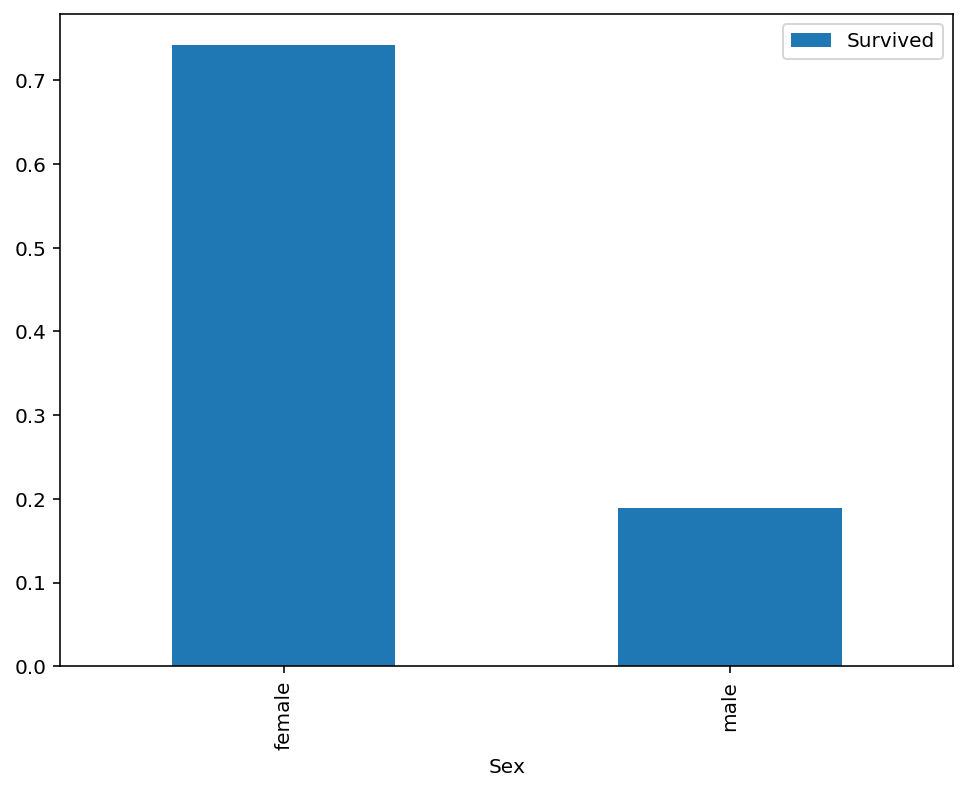

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# see the survival rates for each sex
sex_pivot = train.pivot_table(index='Sex', values='Survived')

# plot sex_pivot
sex_pivot.plot(kind = 'bar', figsize=(8,6));

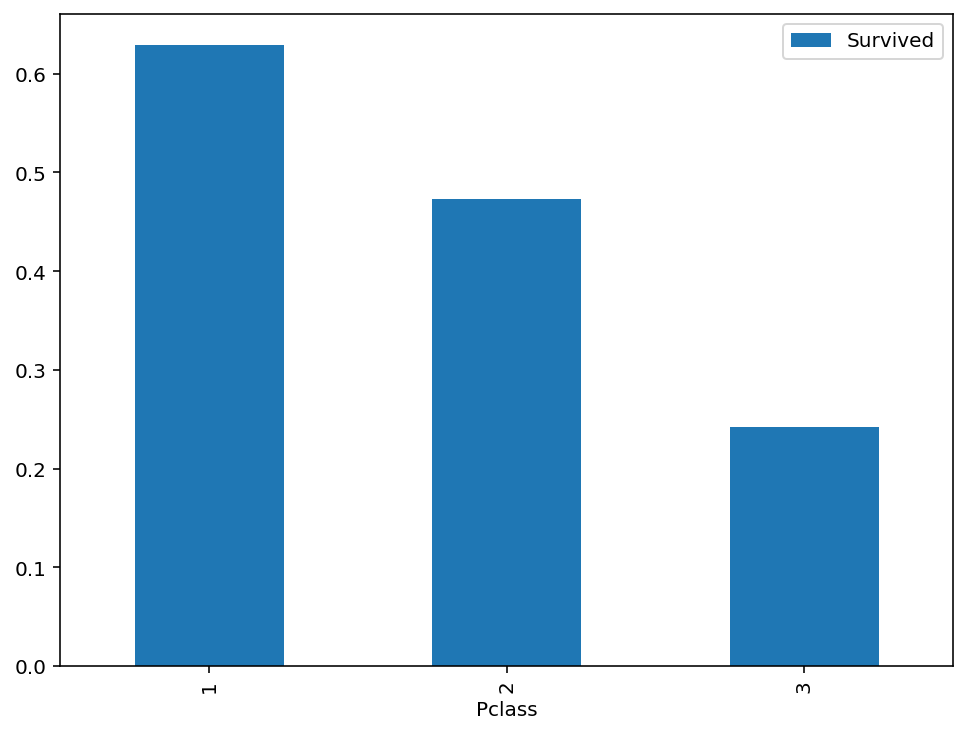

In [37]:
# do the same as above but with passenger class
train.pivot_table(index='Pclass', values='Survived').plot.bar(figsize=(8,6));

In [38]:
# let's take a look at the Age column
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

There are 714 values in the `Age` column which is fewer than the 891 rows in `train`. This indicates that we are going to have to address missing values.

Additionally `Age` is a continuous numerical column, as compared to the categorical columns of `Sex` and `PClass`. A way to look at the distribution on `Age` would be to use a histogram. Let's create two histograms to visually compare the ages of those that survived versus those that did not. 

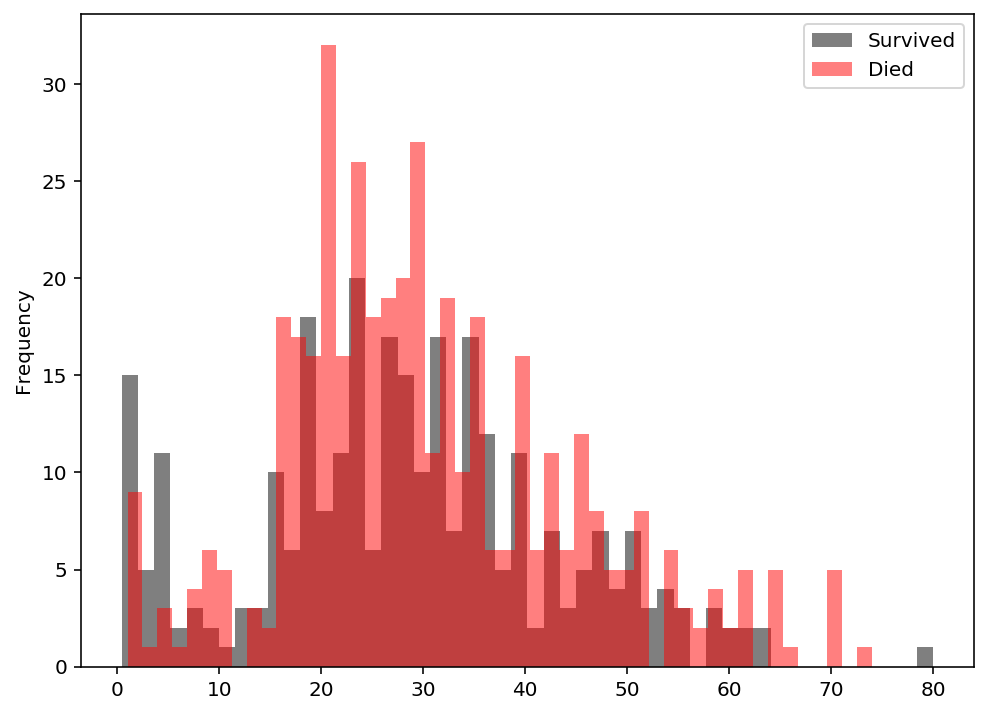

In [39]:
# subset of all passengers that survived
survived = train[train['Survived'] == 1]

# subset of all passengers that did not survive
died = train[train['Survived'] == 0]

# set figsize
plt.figure(figsize=(8,6))

# histogram of the ages of passengers that survived
survived['Age'].plot.hist(alpha=0.5, color='black', bins=50)

# histogram of the age distribution for passengers that did not survive
died['Age'].plot.hist(alpha=0.5, color='red', bins=50)

#plot legend
plt.legend(['Survived', 'Died']);

Upon closer examination, we can see that there are certain ages where there are spikes in the number that survived/did not survive. To help us get a better idea of what is going on, let's use the [`pandas.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) which allows us to separate continuous features into ranges, thus making them categorical. 

Additionally, we have to remember that any changes we make to the `train` data we also need to make to the `test` data. And we also need to address the missing values we observed earlier. 

We can do this by creating a function called `process_age` which will data as input our dataframe, age cut-offs and the corresponding labels and return an updated dataframe. 

In [40]:
# create process_age function
def process_age(df, cut_points, label_names):
    # fill in missing numbers for Age column
    df['Age'] = df['Age'].fillna(-0.5)
    # using cut, segment observations into age categories
    df['Age_categories'] = pd.cut(df['Age'], cut_points, labels = label_names)
    return df

In [41]:
# create list of age cut-offs
cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# apply process_age function to train and test
train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult


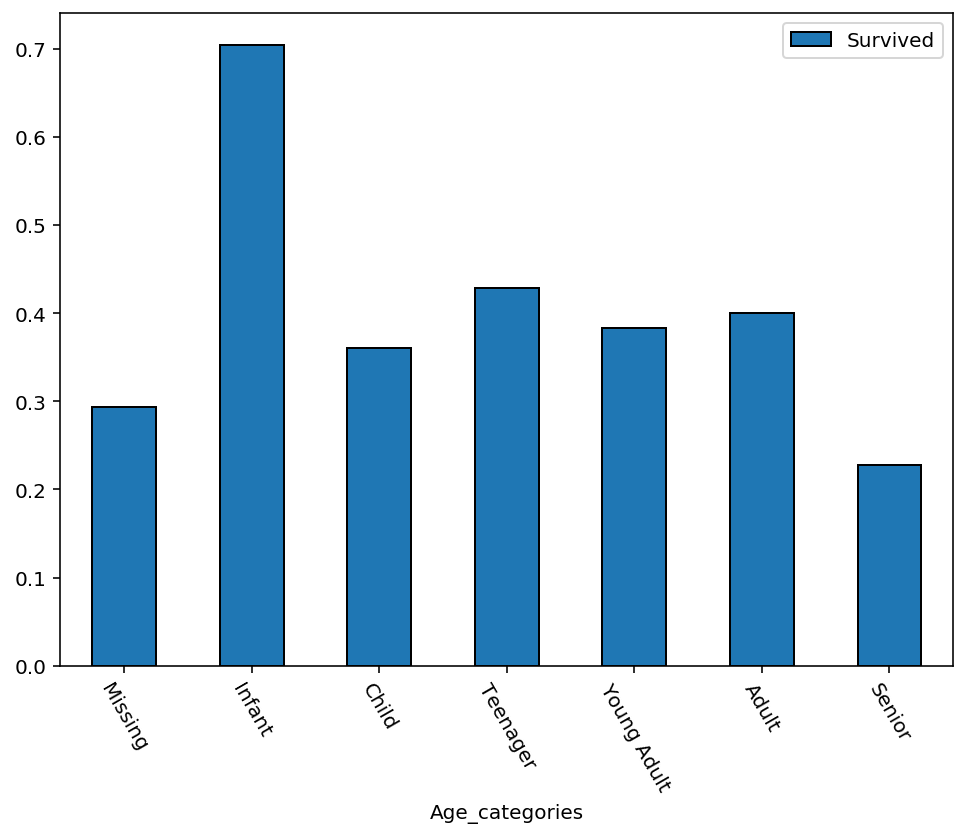

In [53]:
# plot distribution of age categories
train.pivot_table(index='Age_categories', values='Survived').plot.bar(figsize=(8,6), edgecolor='black')
plt.xticks(rotation = 300);

The following three columns may be useful for predicting survival:
- `Sex`
- `Pclass`
- `Age`, or more specifically `Age_categories`

Now we need to prepare these columns for machine learning. Most ML algorithms can't understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful so that we don't imply any numeric relationship where there isn't one, like for example with `Pclass`. They are just labels essentially and don't relay in numeric information as to the relationship between the different classes. In our case, we can use [`pandas.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), which can create dummy columns for each class. Let's create a function called `create_dummies` that does just that!

In [54]:
def create_dummies(df, column_name):
    '''function that creates dummy variables for specified column'''
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    # concatenate original dataframe with dummy dataframe
    df = pd.concat([df,dummies],axis=1)
    return df

In [55]:
# CREATE dummy columns for passenger class
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

In [56]:
# create dummy columns for Sex column
train = create_dummies(train, column_name='Sex')
# create dummy columns for Age_categories column
train = create_dummies(train, column_name='Age_categories')

# create dummy columns for Sex column in test set
test = create_dummies(test, column_name='Sex')
# create dummy columns for Age_categories column in test set
test = create_dummies(test, column_name='Age_categories')

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0


In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior,0,1,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0


### _Creating Our First Machine Learning Model_

Our data has been prepared so now we are ready to train a baseline model, for which we'll use **logistic regression**. This is a common baseline model when performing classification. We'll be using the `scikit-learn` library, and our workflow will include the following steps:
- Instantiate the specific ML model you want to use (i.e. logistic regression)
- Fit the model to the training data
- Use the model to make predictions
- Evaluate the accuracy of the predictions

In [62]:
# load library that stores logistic regression
from sklearn.linear_model import LogisticRegression

# first step: instantiate model
lr = LogisticRegression(solver='lbfgs')

# select the columns we're going to use for our model
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

# independent variables
X = train[columns]

# target variable
y = train['Survived']

# fit model
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The next step is to find out how accurate our model is, and to do that we're going to have to make some predictions. However, since Kaggle does not have the `Survived` column on the test set (we would have to submit to Kaggle to find out accuracy), we're going to have to modify things slightly. 

We we'll do is split the `train` dataframe into two:
- One for training
- One to make prediction with and test model

From now on we'll refer to the Kaggle test set as **holdout** data, which is the technical name given to this type of data used for final predictions.

The `scikit-learn` library has a handy function for train/test split, which we'll use next.

In [63]:
# relabel original test set as holdout
holdout = test

# import train_test_split function
from sklearn.model_selection import train_test_split

# split into train/test with 80/20 split and random seed (for reproducibility)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
# instantiate a new logistic regression object
lr = LogisticRegression(solver='lbfgs')

# fit the model with training data
lr.fit(train_X, train_y)

# import function to get accuracy
from sklearn.metrics import accuracy_score

# make predictions
predictions = lr.predict(test_X)

# use accuracy_score to compare test_y and predictions
accuracy = accuracy_score(test_y, predictions)

print(accuracy)

0.8100558659217877


Let's take this one step further with **cross validation**. The most common form of CV is call **k-fold cross validation**, with each fold referring to each different iteration we train our model on and k representing the number of folds. A value of 5 for k means there are 5 folds, for example. 